# Sentivitities analysis
In this notebook, we analyse the estimated sensitivities for LETO (Line Emission Terahertz Observatory). First, we import the Python packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from astropy.table import Table
from astropy.cosmology import Planck13
import astropy.units as u

We read the number of counts files

In [2]:
All_HII = np.load('../data/processed/NcountsMay_SIDES_LETO_percentiles_poisson_HII.npy',
                  allow_pickle=True)
All_MLP = np.load('../data/processed/NcountsMay_SIDES_LETO_percentiles_poisson_MLP.npy',
                  allow_pickle=True)
All = np.load('../data/processed/NcountsMay_SIDES_LETO_percentiles_poisson.npy',
              allow_pickle=True)

## PRIMA configuration
We define the typical value for 1 hour sensitivity with PRIMA for the different redshifts

In [3]:
def prima_lum(redshift, wemi):
    """For a given redshift and a wavelength of the emitted line, we retrive the luminosity"""
    flux = 3e-19 * u.W/u.m**2  # fix
    distance = Planck13.luminosity_distance(redshift)
    wobs = (1+redshift) * wemi
    lum = (4*np.pi*((distance)**2) * (flux)).to(u.solLum).value
    if wobs <= 300 and wobs >= 25:
        return np.log10(lum / (1+redshift))
    return np.nan

## Counts tables
We count the number of galaxies over with a integration time of 5 hours with a defined SNR

In [4]:
pos_line = {'NII205': 0, 'CII158': 1, 'OI145': 2, 'NII122': 3, 'OIII88': 4,
            'OI63': 5, 'NIII': 6, 'OIII52': 7}
pos_band = {'CI [370]': 0, 'NII [205]': 1, 'CII [158]': 2,
            'OI [145]': 3,  'NII [122]': 4}
SNR = 5
matrix_counts = np.full((8, 5, 4), 'NaN', dtype='object')
for icm, Com in enumerate(All_MLP):
    lim = np.log10(10**(Com['Lums_min'])*SNR)
    for i_int in range(4):
        #     Com = All#_HII[comb]
        above = np.where(Com['Lum_bins'] > lim[i_int])[0]
        Nco = np.sum(Com['mean_counts'][above-1])
        max_nco = np.sum(Com['mean_counts'][above-1] + Com['std'][above-1])
        Nco_st = np.sqrt(np.sum(Com['std'][above-1]**2))
        matrix_counts[pos_line[Com['Line']],
                      pos_band[Com['Band']], i_int] = "%2.2f +/- %2.2f" % (Nco, Nco_st)
        print('Line: {}, z={:1.3f}, mean count={:3.3f}, max count={:3.3f}, {}'.format(
            Com['Line'], Com['z'], Nco, max_nco, Nco_st))

Line: OIII52, z=6.153, mean count=0.000, max count=0.000, 0.0
Line: OIII52, z=6.153, mean count=0.378, max count=1.562, 0.6179158518762896
Line: OIII52, z=6.153, mean count=5.952, max count=12.235, 2.4747024063511143
Line: OIII52, z=6.153, mean count=35.166, max count=52.945, 5.812424967257641
Line: OIII52, z=2.963, mean count=0.000, max count=0.000, 0.0
Line: OIII52, z=2.963, mean count=1.352, max count=3.452, 1.1716347553738737
Line: OIII52, z=2.963, mean count=14.362, max count=23.945, 3.6378427673553992
Line: OIII52, z=2.963, mean count=71.740, max count=98.087, 8.455104966823301
Line: OIII52, z=2.043, mean count=0.004, max count=0.067, 0.06311893535223809
Line: OIII52, z=2.043, mean count=1.514, max count=4.059, 1.195101669315212
Line: OIII52, z=2.043, mean count=15.158, max count=25.469, 3.795887774948046
Line: OIII52, z=2.043, mean count=73.548, max count=100.320, 8.35330353812191
Line: OIII52, z=1.809, mean count=0.072, max count=0.423, 0.2616103973468951
Line: OIII52, z=1.809,

We create the final matrices for each of the integration times

In [5]:
Table(All_MLP)

Line,Band,z,z_min,z_max,Int_times,Lums_min,Fluxes_min,Lum_bins,mean_counts,std,poisson_err,p25,p75
object,object,object,object,object,object,object,object,object,object,object,object,object,object
OIII52,CI [370],6.153059254970083,6.014322847019202,6.2973945426853835,"[<Quantity 3600. s>, <Quantity 36000. s>, <Quantity 360000. s>, <Quantity 3600000. s>]",[9.92994282 9.42994282 8.92994282 8.42994282],[5.26900941e-19 1.66620707e-19 5.26900941e-20 1.66620707e-20],[ 5. 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6. 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7. 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8. 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9. 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9 10. 10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. 11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12. ],[5.36246e+02 5.70244e+02 6.00592e+02 6.26942e+02 6.48100e+02 6.67322e+02 6.86056e+02 6.96322e+02 7.03344e+02 7.02076e+02 6.91128e+02 6.68634e+02 6.40120e+02 6.03434e+02 5.62922e+02 5.18860e+02 4.71536e+02 4.25644e+02 3.80002e+02 3.39402e+02 3.02596e+02 2.66544e+02 2.35870e+02 2.08352e+02 1.82616e+02 1.59386e+02 1.39298e+02 1.19774e+02 1.03480e+02 8.87840e+01 7.62660e+01 6.35860e+01 5.52880e+01 4.77000e+01 3.93200e+01 3.20720e+01 2.64840e+01 2.19040e+01 1.80000e+01 1.48040e+01 1.21400e+01 9.56000e+00 7.26200e+00 5.59800e+00 3.94600e+00 2.84800e+00 2.06600e+00 1.43800e+00 1.10200e+00 6.58000e-01 3.10000e-01 1.52000e-01 1.08000e-01 9.40000e-02 2.40000e-02 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00],[22.24008732 22.62557102 23.81725291 25.02627891 25.81755217 25.36324735 24.03906953 24.91855365 26.26354249 25.63533156 26.36451433 25.30185851 25.71422952 21.57900934 22.87050319 22.12501751 21.0950398 20.67591023 18.87861213 17.53317986 17.02283126 16.05914269 15.22619782 14.28454045 12.6903327 12.80628767 11.39706962 10.67946272 9.78496806 8.93159247 8.91242077 7.97763148 7.37814719 7.02153829 6.16973257 5.25840432 5.01854003 4.24532496 4.29837178 3.85559126 3.48373363 3.00905301 2.58869774 2.35550334 1.97156892 1.5712721 1.48783198 1.18074383 1.11516636 0.77268105 0.54212545 0.38587044 0.3468948 0.29860342 0.15304901 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ],[23.15698599 23.87978224 24.5069786 25.03880988 25.45780823 25.83257633 26.19267073 26.3879139 26.52063348 26.49671678 26.28931342 25.85795816 25.30059288 24.56489365 23.72597732 22.77849863 21.71487969 20.63114151 19.49363999 18.42286623 17.39528672 16.3261753 15.35805977 14.43440335 13.51354876 12.62481683 11.80245737 10.94413085 10.17251198 9.4225262 8.73304071 7.97408302 7.43559009 6.90651866 6.27056616 5.66321463 5.14626078 4.68017094 4.24264069 3.84759665 3.48425028 3.09192497 2.69480983 2.3660093 1.98645413 1.68760185 1.43735869 1.19916638 1.04976188 0.81117199 0.55677644 0.38987177 0.32863353 0.30659419 0.15491933 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ],[521.75 555. 584. 611. 631. 650. 669.75 679. 686. 684. 672.75 650. 622. 589. 548. 505. 457. 412. 367. 327. 291. 256. 226. 199. 174. 151. 131. 112. 97. 83. 70. 58. 50. 43. 35. 28. 23. 19. 15. 12. 10. 7.75 5. 4. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ],[551. 585. 616. 643. 664. 683. 703. 713.25 719. 721. 708. 686.25 658. 619. 578. 533. 487. 440. 392. 352. 314. 278. 245. 219. 192. 168. 147. 127. 110. 95. 83. 69. 60. 53. 43. 36. 30. 25. 21. 17. 14. 12. 9. 7. 5. 4. 3. 2. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ]
OIII52,NII [205],2.9625554912179117,2.919608678370764,3.0064538591904264,"[<Quantity 3600. s>, <Quantity 36000. s>, <Quantity 360000. s>, <Quantity 3600000. s>]",[10.02812602 9.52812602 9.02812602 8.52812602],[2.05625732e-18 6.50245660e-19 2.05625732e-19 6.50245660e-20],[ 5. 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6. 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7. 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8. 8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9. 9.1 9.2 9.3 9.4 9.5 9.6 9.7 

In [6]:
Final = Table(matrix_counts[:, :, 2], names=pos_band)
Final.add_column([i for i in pos_line], index=0, name='Line\Band')
Final

Line\Band,CI [370],NII [205],CII [158],OI [145],NII [122]
str6,object,object,object,object,object
NII205,1.53 +/- 1.20,0.00 +/- 0.00,NaN,NaN,NaN
CII158,275.78 +/- 16.49,7.65 +/- 2.81,0.00 +/- 0.00,NaN,NaN
OI145,0.91 +/- 0.96,0.00 +/- 0.00,0.06 +/- 0.23,0.00 +/- 0.00,NaN
NII122,0.23 +/- 0.48,0.02 +/- 0.14,0.00 +/- 0.00,0.00 +/- 0.00,0.00 +/- 0.00
OIII88,155.35 +/- 12.17,32.31 +/- 5.49,19.18 +/- 4.30,20.36 +/- 4.51,12.49 +/- 3.45
OI63,29.58 +/- 5.36,15.94 +/- 3.88,24.78 +/- 4.96,16.40 +/- 3.94,16.07 +/- 4.09
NIII,1.71 +/- 1.26,1.84 +/- 1.34,4.05 +/- 1.99,2.83 +/- 1.63,1.58 +/- 1.23
OIII52,5.95 +/- 2.47,14.36 +/- 3.64,15.16 +/- 3.80,19.55 +/- 4.29,18.36 +/- 4.32


In [7]:
Final = Table(matrix_counts[:, :, 1], names=pos_band)
Final.add_column([i for i in pos_line], index=0, name='Line\Band')
Final

Line\Band,CI [370],NII [205],CII [158],OI [145],NII [122]
str6,object,object,object,object,object
NII205,0.06 +/- 0.25,0.00 +/- 0.00,NaN,NaN,NaN
CII158,61.74 +/- 7.72,0.96 +/- 0.95,0.00 +/- 0.00,NaN,NaN
OI145,0.00 +/- 0.06,0.00 +/- 0.00,0.00 +/- 0.00,0.00 +/- 0.00,NaN
NII122,0.00 +/- 0.00,0.00 +/- 0.00,0.00 +/- 0.00,0.00 +/- 0.00,0.00 +/- 0.00
OIII88,36.42 +/- 5.96,3.89 +/- 1.93,2.78 +/- 1.67,2.72 +/- 1.64,2.11 +/- 1.43
OI63,3.65 +/- 1.87,1.57 +/- 1.25,2.99 +/- 1.67,2.00 +/- 1.42,0.95 +/- 0.98
NIII,0.02 +/- 0.13,0.00 +/- 0.00,0.33 +/- 0.56,0.13 +/- 0.36,0.03 +/- 0.16
OIII52,0.38 +/- 0.62,1.35 +/- 1.17,1.51 +/- 1.20,1.86 +/- 1.34,1.90 +/- 1.35


In [7]:
Final.write('../data/processed/Example_counts.tex',
            format='latex', overwrite=True)

In [8]:
Final['NII [205]', 'CI [370]'][1], Final['NII [205]', 'CI [370]'][4]

(<Row index=1>
   NII [205]      CI [370]   
     object        object    
 ------------- --------------
 0.96 +/- 0.95 61.74 +/- 7.72,
 <Row index=4>
   NII [205]      CI [370]   
     object        object    
 ------------- --------------
 3.89 +/- 1.93 36.42 +/- 5.96)

## Counts plots
Now we plot the same information graphically

In [75]:
dict_prima = {'NII205': 205.30,
              'CII158': 157.68,
              'OI145': 145.53,
              'NII122': 121.8,
              'OIII88': 88.36,
              'OI63': 63.18,
              'NIII': 57.34,
              'OIII52': 51.81}
band_numbers = [1, 2, 2, 3, 3]

<ipython-input-78-d965ca6ae89f>:78: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


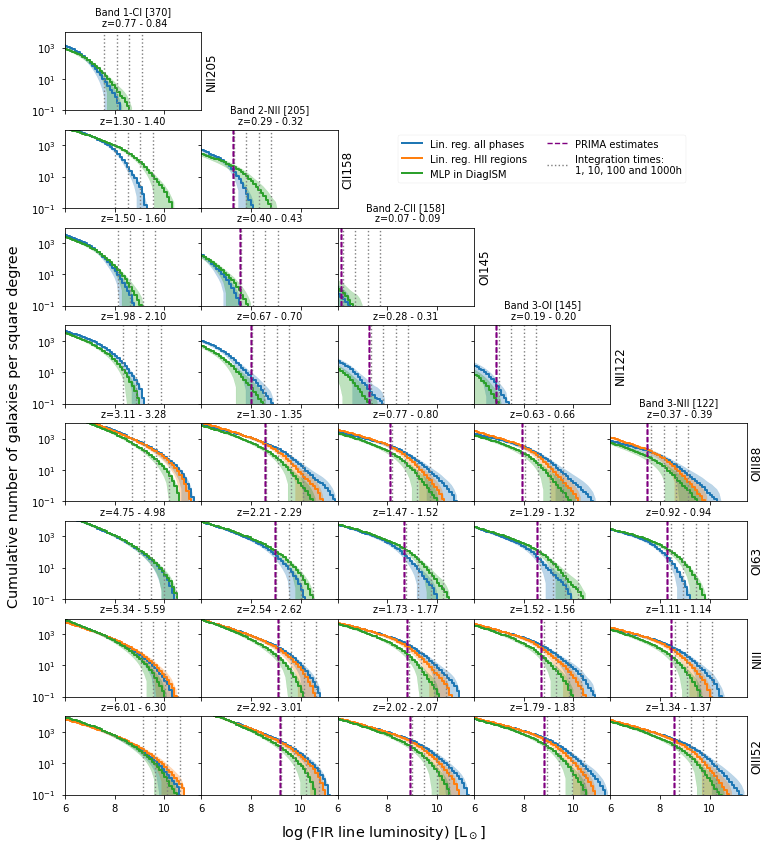

In [78]:
with plt.style.context(('seaborn-paper')):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    fig, all_axs = plt.subplots(8, 5, figsize=(7.27*1.5, 8*1.5), constrained_layout=True,
                                sharex=True, sharey=True)
    axs = all_axs  # .flatten()
    for axi in all_axs.ravel():
        axi.set_axis_off()
    for icm, Com in enumerate(All):
        xpos = pos_band[Com['Band']]
        ypos = pos_line[Com['Line']]
        axs[ypos, xpos].step(x=Com['Lum_bins'][::-1][:-1],
                             y=np.cumsum(Com['mean_counts'][::-1]), label='Lin. reg. all phases',
                             c='C0', lw=2)
        axs[ypos, xpos].fill_between(x=Com['Lum_bins'][::-1][:-1],
                                     y1=np.cumsum(Com['mean_counts'][::-1]) +
                                     np.cumsum(Com['std'][::-1]),
                                     y2=np.cumsum(Com['mean_counts'][::-1]) -
                                     np.cumsum(Com['std'][::-1]),
                                     color='C0', alpha=0.3)
        axs[ypos, xpos].set_yscale('log')
        if Com['z_max'] > 0.05:
            axs[ypos, xpos].set_title('z=%.2f - %.2f' %
                                      (Com['z_min'], Com['z_max']))
            if ypos == xpos:
                axs[ypos, xpos].set_title('Band %i-%s\n z=%.2f - %.2f' %
                                          (band_numbers[xpos], Com['Band'],
                                           Com['z_min'], Com['z_max']))
                axs[ypos, xpos].set_ylabel(Com['Line'])
                axs[ypos, xpos].yaxis.set_label_position("right")
            axs[ypos, xpos].axis('on')
        axs[ypos, xpos].set_ylim(1e-1, 1e4)
        axs[ypos, xpos].set_xlim(6, 11.5)
        axs[ypos, 4].set_ylabel(Com['Line'])
        axs[ypos, 4].yaxis.set_label_position("right")
    for icm, Com in enumerate(All_HII):
        xpos = pos_band[Com['Band']]
        ypos = pos_line[Com['Line']]
        if ypos in [4, 6, 7]:
            axs[ypos, xpos].step(x=Com['Lum_bins'][::-1][:-1],
                                 y=np.cumsum(Com['mean_counts'][::-1]), label='Lin. reg. HII regions',
                                 c='C1', lw=2)
            axs[ypos, xpos].fill_between(x=Com['Lum_bins'][::-1][:-1],
                                         y1=np.cumsum(Com['mean_counts'][::-1]) +
                                         np.cumsum(Com['std'][::-1]),
                                         y2=np.cumsum(Com['mean_counts'][::-1]) -
                                         np.cumsum(Com['std'][::-1]),
                                         color='C1', alpha=0.3)
    for icm, Com in enumerate(All_MLP):
        xpos = pos_band[Com['Band']]
        ypos = pos_line[Com['Line']]
        axs[ypos, xpos].step(x=Com['Lum_bins'][::-1][:-1],
                             y=np.cumsum(Com['mean_counts'][::-1]), label='MLP in DiagISM',
                             c='C2', lw=2)
        axs[ypos, xpos].fill_between(x=Com['Lum_bins'][::-1][:-1],
                                     y1=np.cumsum(Com['mean_counts'][::-1]) +
                                     np.cumsum(Com['std'][::-1]),
                                     y2=np.cumsum(Com['mean_counts'][::-1]) -
                                     np.cumsum(Com['std'][::-1]),
                                     color='C2', alpha=0.3)
        for i_int in range(4):
            if Com['z_max'] > 0.05:
                axs[ypos, xpos].axvline(x=np.log10(10**(Com['Lums_min'][i_int])*SNR),
                                        ls=':', c='gray')
                axs[ypos, xpos].axvline(x=prima_lum(Com['z'], dict_prima[Com['Line']]),
                                        ls='--', c='purple',
                                       label='PRIMA estimates' if i_int==0 else None)
    handles, labels = axs[4, 0].get_legend_handles_labels()
    lines_int = Line2D(
        [0], [0], label='Integration times: \n1, 10, 100 and 1000h', color='gray', ls=':')
    handles.extend([lines_int])
    axs[1, 3].legend(handles=handles, ncol=2, loc='upper center')
    fig.supxlabel(r'$\log$(FIR line luminosity) [L$_\odot$]',  va='top', y=0.04)
    fig.supylabel('Cumulative number of galaxies per square degree', ha='left')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.25)
    plt.savefig('../figures/Counts.pdf',
                dpi=300, bbox_inches='tight')  # For Paper

We also retrieve some information from the plots for the main text.

In [48]:
# Location of the OIII88-BandCII is 17 and the luminositity bin at log(Lum[Lsun])=9 is 40
print('Counts for the different models:',
      All['mean_counts'][17][40], All_HII['mean_counts'][17][40], All_MLP['mean_counts'][17][40])
# Location of the NIII-BandCII is 7 and the luminositity bin at log(Lum[Lsun])=10 is 50
print('Counts for the different models:',
      All['mean_counts'][7][40], All_HII['mean_counts'][7][50], All_MLP['mean_counts'][7][50])

Counts for the different models: 10.878 6.724 2.122
Counts for the different models: 23.464 0.526 0.02


##### Notebook information

In [8]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w 

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.59.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
autopep8  : 1.5.7
numpy     : 1.22.1
matplotlib: 3.4.3
json      : 2.0.9

Watermark: 2.2.0

